In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### --- **ETL** ---

In [3]:
df = pd.read_csv("bitcoin_price.csv")  # Load the Bitcoin price data from a CSV file

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [6]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [7]:
df.shape

(1556, 7)

In [8]:
df.describe().T # Transpose the description for better readability

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [9]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df["Date"].dtype

dtype('<M8[ns]')

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [12]:
print(f" Start Date : {df['Date'].min()} \n End Date : {df['Date'].max()}")

 Start Date : 2013-04-28 00:00:00 
 End Date : 2017-07-31 00:00:00


In [13]:
# To check missing values
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [14]:
# To check duplicate rows
df.duplicated().sum()

np.int64(0)

In [15]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [16]:
df.tail(3)

,Date,Open,High,Low,Close,Volume,Market Cap
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [17]:
df.sort_values(by="Date", ascending=True, inplace=True)  # Sort the DataFrame by date in ascending order

In [18]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


### --- **EDA** ---
#####  Problem Statement
- What was the change in price of the over time?
- Analysing Open, High, Low, Close value of Bitcoin.
- Analyzing the closing price.
- Analyzing closing price on yearly, quaterly, monthly basis
- Analyzing daily change in closing price of stocks

In [19]:
data = df.reset_index()
data.drop("index", axis=1, inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [20]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

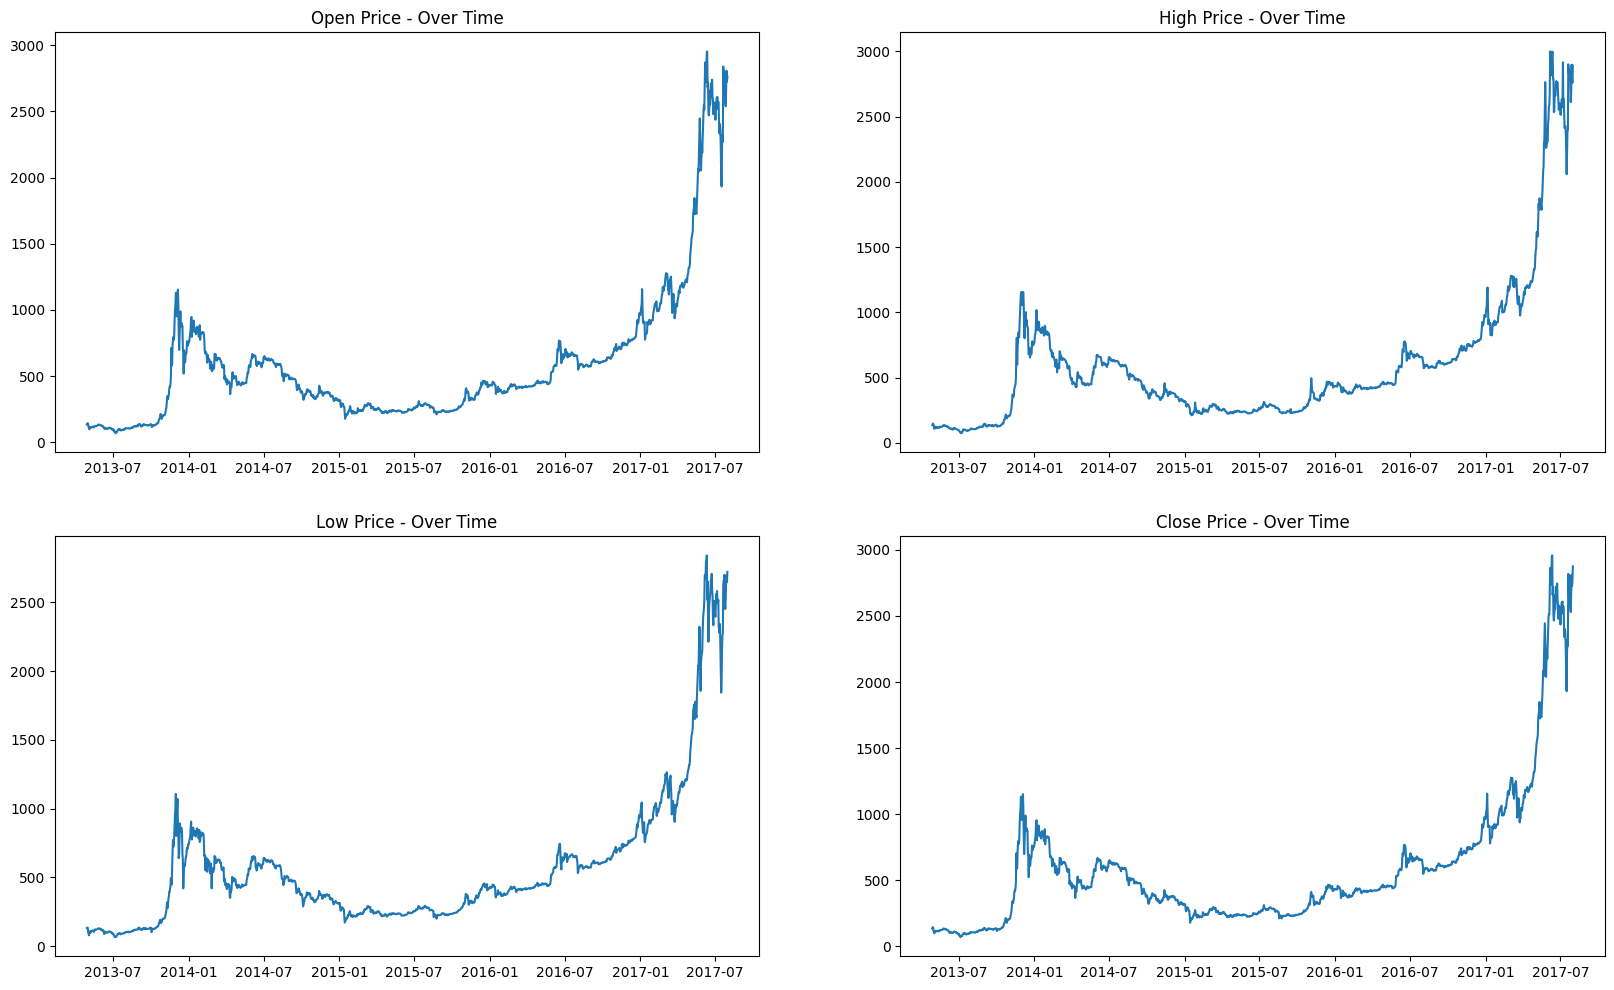

In [21]:
# Here we will plot the price changes over time for Open, High, Low, and Close prices

plt.figure(figsize=(20, 12))

for index, col in enumerate(['Open', 'High', 'Low', 'Close'], start=1):
    plt.subplot(2,2, index)
    plt.plot(data['Date'], data[col])
    plt.title(f"{col} Price - Over Time")

In [22]:
# TO analyze open, close, high, low price of Bitcoin we'll use candlestick chart

import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True) # For offline use in Jupyter Notebooks

In [23]:
data = data[0:100]  # Limiting to first 100 rows for better visualization

In [24]:
trace = go.Candlestick(x=data['Date'],
               open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])

candle_data = [trace]

In [25]:
fig = go.Figure(data = candle_data) # Create a figure with the candlestick data
iplot(fig)  # Display the figure
fig.update_layout(
    title = "Bitcoin Price Analysis",
    yaxis_title = "Price (in USD)",
    xaxis_title = "Date",
    xaxis_rangeslider_visible= False   # Hiding the range slider
)  

In [26]:
# Analysis of Closing Price in depth

data = df.set_index('Date')  # Set 'Date' as the index for time series analysis

<Axes: xlabel='Date'>

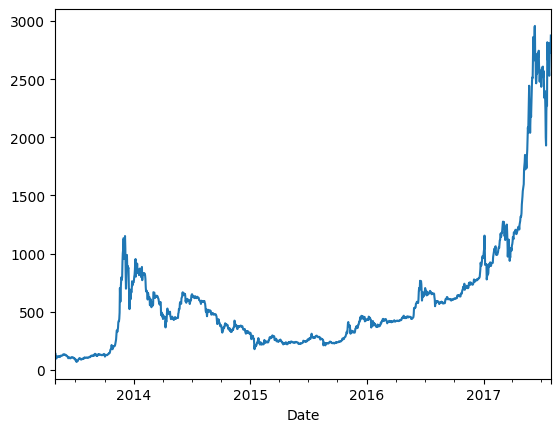

In [27]:
data['Close'].plot()

In [28]:
# Closing price over time using Plotly Express for better interactivity

fig = px.line(data, y='Close', title='Closing Price Over Time')
fig.show()

Text(0.5, 1.0, 'Log Scale')

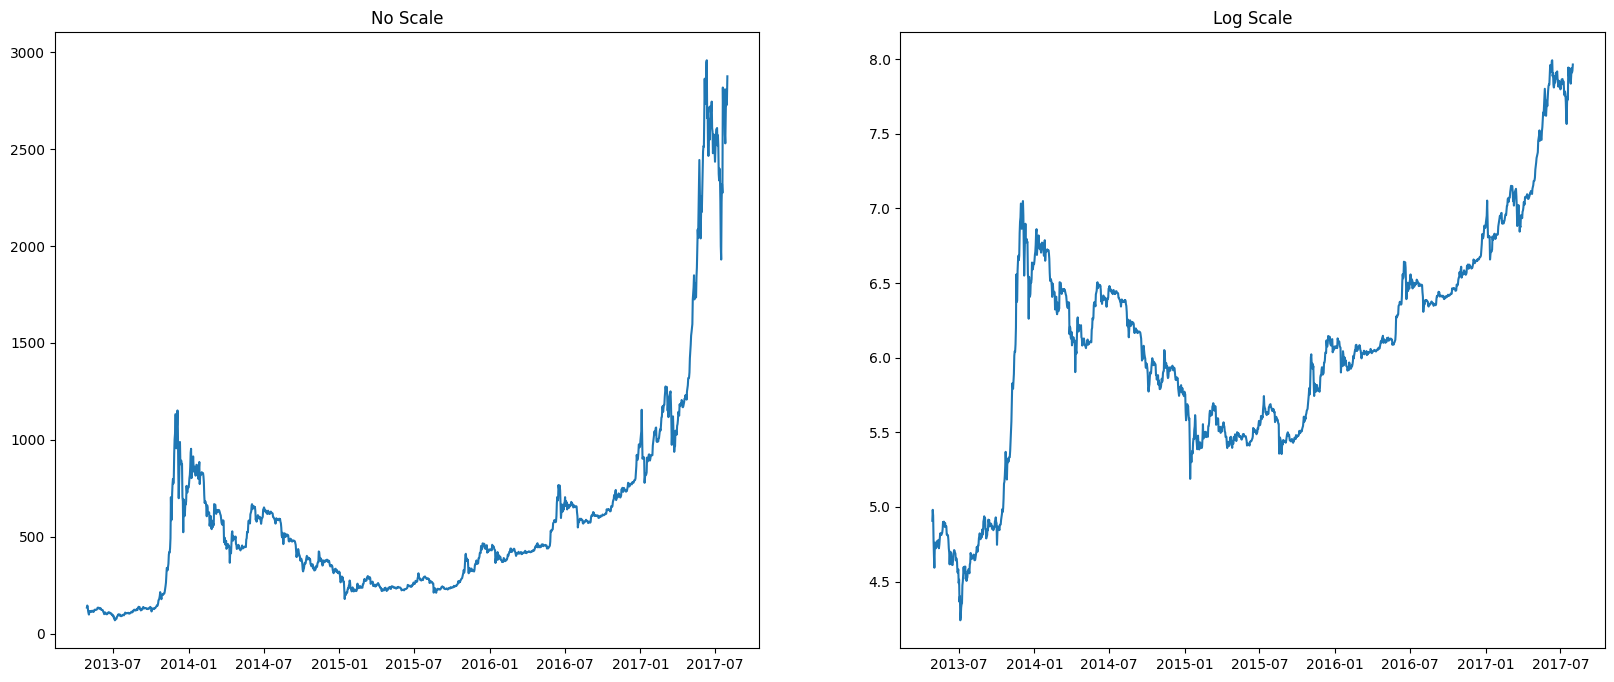

In [29]:
# creating log plot using "log1p" to visualize the closing price in a logarithmic scale 

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(data['Close'])
plt.title('No Scale')

plt.subplot(1, 2, 2)
plt.plot(np.log1p(data['Close']))
plt.title('Log Scale')

In [30]:
# Analyzing closing price on yearly, quaterly, monthly basis

data['Close']  # Display the 'Close' price series

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [31]:
data['Close'].resample('YE').mean()  # Yearly resampling and calculating the mean closing price

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: YE-DEC, Name: Close, dtype: float64

<Axes: title={'center': 'Yearly Mean Closing Price'}, xlabel='Date'>

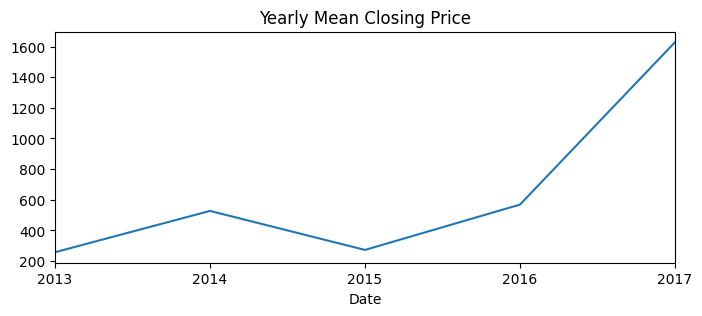

In [32]:
data['Close'].resample('YE').mean().plot(title="Yearly Mean Closing Price", figsize=(8, 3)) # Plotting the yearly mean closing price

In [33]:
# Yearly Mean Closing Price using Plotly Express

mean_cpY = data['Close'].resample('YE').mean()
fig = px.line(mean_cpY, y='Close', title='Yearly Mean Closing Price', markers = True)
fig.update_traces(
    mode='lines+markers+text',
    text=mean_cpY.round(2),
    textposition='top center',
    texttemplate='%{text}',
    textfont=dict(size=15)
)
fig.show()

In [34]:
# Quaterly Mean Closing Price using Plotly Express

mean_cpQ = data['Close'].resample('QE').mean()
fig = px.line(mean_cpQ, y='Close', title='Quaterly Mean Closing Price', markers = True)
fig.update_traces(
    mode='lines+markers+text',
    text=mean_cpQ.round(2),
    textposition='top center',
    texttemplate='%{text}',
    textfont=dict(size=10)
)
fig.show()

In [35]:
# Monthly Mean Closing Price using Plotly Express
mean_cpM = data['Close'].resample('ME').mean()
fig = px.line(mean_cpM, y='Close', title='Monthly Mean Closing Price', markers = True)
fig.update_traces(
    mode='lines+markers+text',
    text=mean_cpM.round(2),
    textposition='top center',
    texttemplate='%{text}',
    textfont=dict(size=4)
)
fig.show()

In [64]:
# Analyzing daily change in closing price of stocks

data['close_pc'] = data['Close'].pct_change() * 100  # Calculate the daily percentage change in closing price
data['close_pc']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: close_pc, Length: 1556, dtype: float64

In [79]:
fig = px.line(close_pc, title='Daily Percentage Change in Closing Price', labels={'value': 'Percentage Change'}, line_shape='spline')
fig.update_traces(line=dict(color='green',width=1))
fig.show()